In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Math
from scipy.special import eval_genlaguerre
from numpy import pi, sqrt, array
from qutip import *
from matplotlib.lines import Line2D
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 18}

# mpl.rc('font', **font)

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   

# Estimate the population at n+1 starting in n

C:\ProgramData\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: S:\Ankur\Stimulated Emission\rhs161880.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Final populations using non-RWA
n=0: 0.99967227
n=1: 0.00032762
n=2: 0.00000011
Final avg. photon = 0.000328


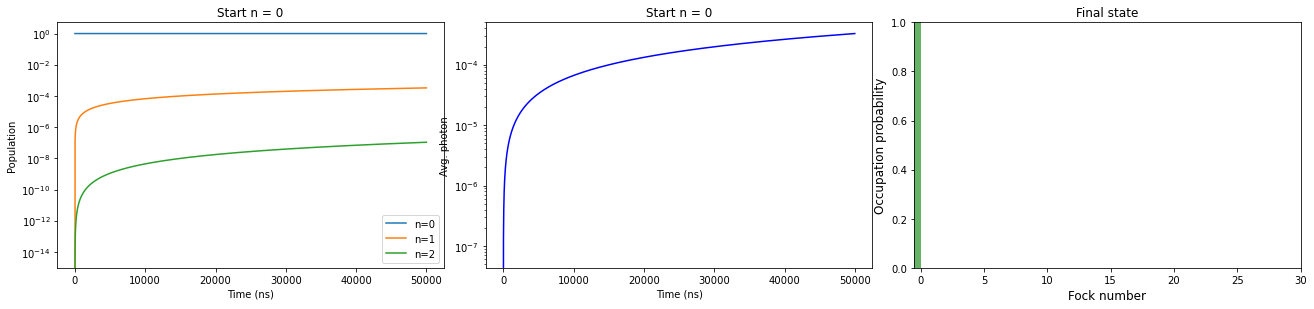

In [2]:
# Resonator parameters
f = 5.96             # in GHz
T1 = 1.5e6 # in ns
amp = 0.0000 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/T1)   # Coupling rate to heat bath
nth= 0.01         # Temperature with <n>=0.050
fock_start = 0
# Simulation parameters
t_end = 50000 # in ns
t_points = 5001
# plot_pop_list = [-2, -1, 1, 2]  # List for plotting population
plot_pop_list = [0, 1, 2]  # List for plotting population

dim = 30
use_RWA = False
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())
psi0 = fock(dim,fock_start) # initial state
tlist = np.linspace(0, t_end, t_points)
args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
if use_RWA:
    output = mesolve(H_rwa, psi0, tlist, c_ops, [])
else:
    output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
fig, axs  = plt.subplots(1, 3, figsize=(18, 4))
fig.tight_layout()
ax1 = axs[0]
for n in plot_pop_list:
    ax1.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
ax1.set_title('Start n = %s'%(fock_start))
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Population')
ax1.set_yscale('log')
ax1.legend()
ax2 = axs[1]
ax2.plot(tlist, expect(a.dag()*a, output.states), 'b')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Avg. photon')
ax2.set_title('Start n = %s'%(fock_start))
ax2.set_yscale('log')

ax3 = axs[2]   
plot_fock_distribution(output.states[-1], fig=fig, ax=ax3, title="Final state");
if use_RWA: print('Final populations using RWA')
else: print('Final populations using non-RWA')
for n in plot_pop_list:
    print('n=%s: %.8f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))

In [66]:
(amp*300/2)

0.09424777960769379

Final populations using RWA
n=4: 0.04313409
n=5: 0.90517440
n=6: 0.05047760
n=7: 0.00079648
Final avg. photon = 5.008132


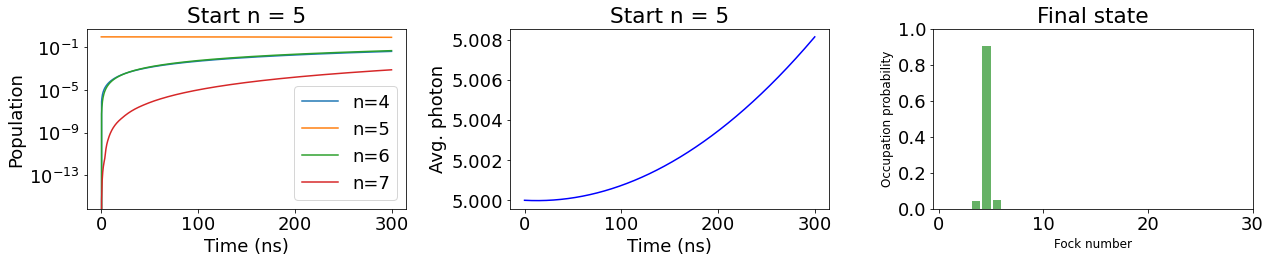

In [67]:
# Resonator parameters
f = 5.77             # in GHz
T1 = 2e6 # in ns
amp = 0.0001 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/T1)   # Coupling rate to heat bath
nth= 0.001          # Temperature with <n>=0.050
fock_start = 5
# Simulation parameters
t_end = 300 # in ns
t_points = 1001
# plot_pop_list = [-2, -1, 1, 2]  # List for plotting population
plot_pop_list = [-1, 0, 1, 2]  # List for plotting population

dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())
psi0 = fock(dim,fock_start) # initial state
tlist = np.linspace(0, t_end, t_points)
args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
if use_RWA:
    output = mesolve(H_rwa, psi0, tlist, c_ops, [])
else:
    output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1,3,1)
for n in plot_pop_list:
    ax1.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
ax1.set_title('Start n = %s'%(fock_start))
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Population')
ax1.set_yscale('log')
ax1.legend()
ax2 = fig.add_subplot(1,3,2)
ax2.plot(tlist, expect(a.dag()*a, output.states), 'b')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Avg. photon')
ax2.set_title('Start n = %s'%(fock_start))
ax3 = fig.add_subplot(1,3,3)   
plot_fock_distribution(output.states[-1], fig=fig, ax=ax3, title="Final state");
fig.tight_layout()
if use_RWA: print('Final populations using RWA')
else: print('Final populations using non-RWA')
for n in plot_pop_list:
    print('n=%s: %.8f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))

0
Final populations using RWA
5
Final populations using RWA
10
Final populations using RWA


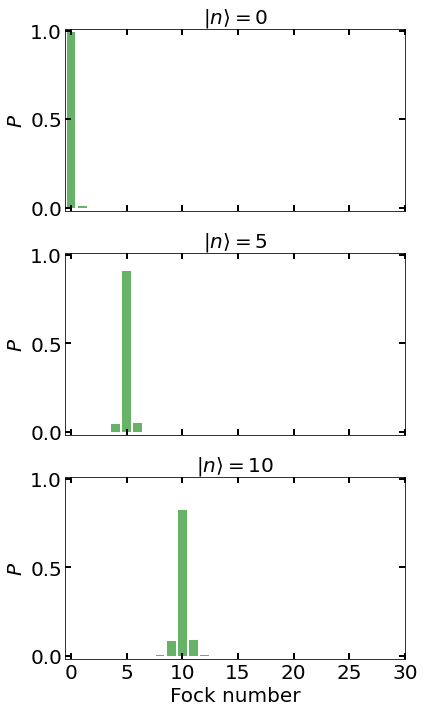

In [5]:
# Resonator parameters
f = 5.77             # in GHz
T1 = 2e6 # in ns
amp = 0.0001 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/T1)   # Coupling rate to heat bath
nth= 0.001          # Temperature with <n>=0.050
fock_start = [0, 5, 10]
# Simulation parameters
t_end = 300 # in ns
t_points = 1001
# plot_pop_list = [-2, -1, 1, 2]  # List for plotting population
plot_pop_list = [-1, 0, 1, 2]  # List for plotting population

dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 10))
# plt.style.use('dark_background')#212121ff

# fig.set_facecolor('#212121ff')
for ii, fnum in enumerate(fock_start):
    print(fnum)
    psi0 = fock(dim, int(fnum)) # initial state
    tlist = np.linspace(0, t_end, t_points)
    args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
    if use_RWA:
        output = mesolve(H_rwa, psi0, tlist, c_ops, [])
    else:
        output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
    ax = axs[ii]
#     ax.set_facecolor('#212121ff')

    z, u = plot_fock_distribution(output.states[-1], fig=fig, ax=ax)
#     u.axes.yaxis.set_visible(False)
    u.set_title(r'$\left|n\right\rangle = %.f$'%fnum, fontsize=20)
    u.set_ylabel('$P$', fontsize=20)
    u.set_xlabel('')
    u.set_ylim(-0.02, 1.01)
    u.set_yticks([0, 0.5, 1])
    u.set_xticks([0, 5, 10, 15, 20, 25, 30])
    u.tick_params(direction='in', length=6, width=2, colors='k', \
        grid_color='r', grid_alpha=0.5, labelsize=20, labelbottom=False, right=True, top=True, labelleft=True)

    if use_RWA: 
        print('Final populations using RWA')
    else: 
        print('Final populations using non-RWA')
#     for n in plot_pop_list:
#         print('n=%s: %.8f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
#     print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))
u.set_xlabel('Fock number', fontsize=20)
u.tick_params(direction='in', length=6, width=2, colors='k', \
    grid_color='r', grid_alpha=0.5, labelsize=20, labelbottom=True, right=True, top=True, left=True)

fig.tight_layout()
fig.savefig('Fock_state_prep_light.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Final populations using RWA
n=0: 0.00023892
n=1: 0.99958319
n=2: 0.00017787
n=3: 0.00000002
Final avg. photon = 0.999939


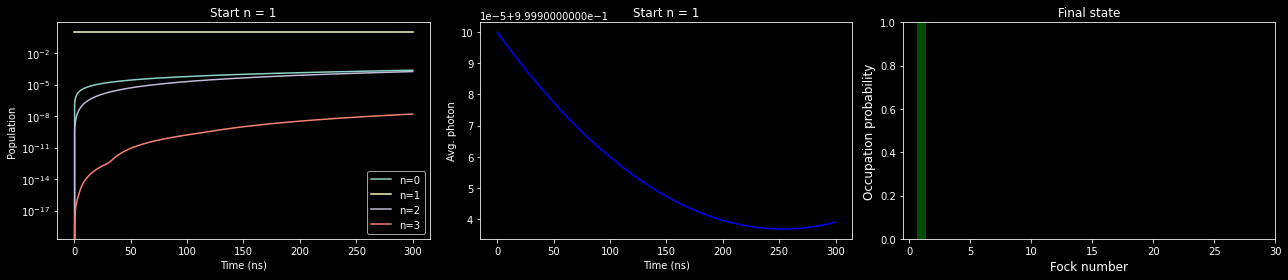

In [3]:
# Resonator parameters
f = 5.77             # in GHz
T1 = 2e6 # in ns
amp = 0.00001 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/T1)   # Coupling rate to heat bath
nth= 0.001          # Temperature with <n>=0.050
fock_start = 1
# Simulation parameters
t_end = 300 # in ns
t_points = 1001
# plot_pop_list = [-2, -1, 1, 2]  # List for plotting population
plot_pop_list = [-1, 0, 1, 2]  # List for plotting population

dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())
psi0 = fock(dim,fock_start) # initial state
tlist = np.linspace(0, t_end, t_points)
args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
if use_RWA:
    output = mesolve(H_rwa, psi0, tlist, c_ops, [])
else:
    output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1,3,1)
for n in plot_pop_list:
    ax1.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
ax1.set_title('Start n = %s'%(fock_start))
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Population')
ax1.set_yscale('log')
ax1.legend()
ax2 = fig.add_subplot(1,3,2)
ax2.plot(tlist, expect(a.dag()*a, output.states), 'b')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Avg. photon')
ax2.set_title('Start n = %s'%(fock_start))
ax3 = fig.add_subplot(1,3,3)   
plot_fock_distribution(output.states[-1], fig=fig, ax=ax3, title="Final state");
fig.tight_layout()
if use_RWA: print('Final populations using RWA')
else: print('Final populations using non-RWA')
for n in plot_pop_list:
    print('n=%s: %.8f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))

# Varying the initial Fock state to check the population at n+1

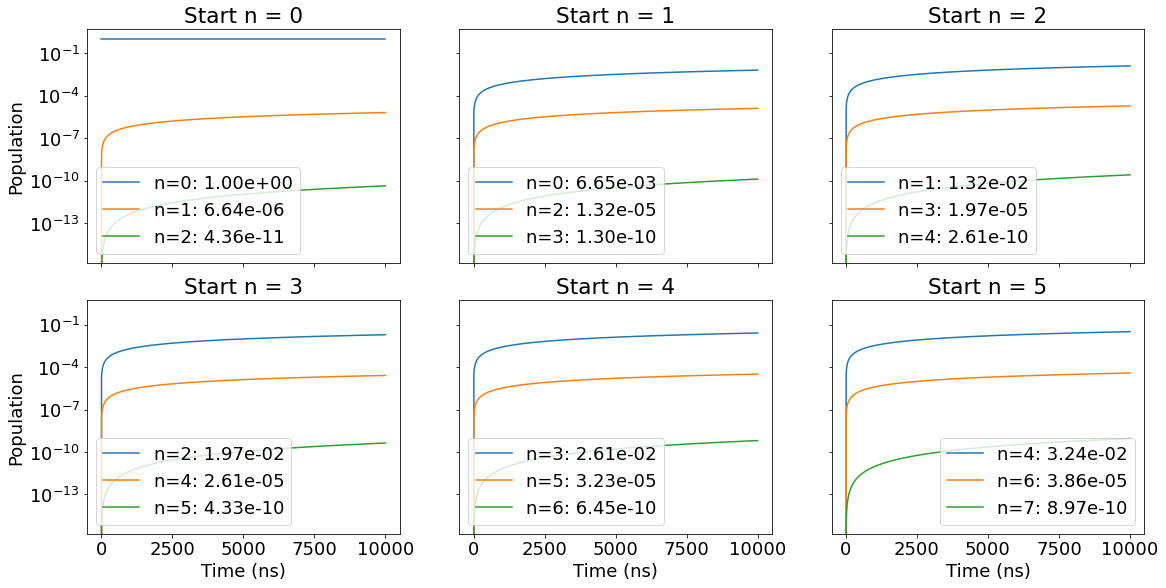

In [27]:
# Resonator parameters
f = 5.77             # in GHz
T1 = 1.5e6 # in ns
amp = 0.0000 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/T1)   # Coupling rate to heat bath
nth= 0.001          # Temperature with <n>=0.050

# Simulation parameters
t_end = 10000 # in ns
t_points = 1001
tlist = np.linspace(0, t_end, t_points)
dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(16, 4*2))
fig. tight_layout()


for fock_start in range(6):
    if fock_start ==0:
        plot_pop_list = [0, 1, 2]  # List for plotting population
    else:
        plot_pop_list = [-1, 1, 2]  # List for plotting population
        
    psi0 = fock(dim, fock_start) # initial state
    args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
    if use_RWA:
        output = mesolve(H_rwa, psi0, tlist, c_ops, [])
    else:
        output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
    
    ax = axs[fock_start//3, fock_start%3]
        
    for n in plot_pop_list:
        ax.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), 
                label='n={:<}: {:<.2e}'.format(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
    ax.set_title('Start n = %s'%(fock_start))
    axs[fock_start//3, 0].set_ylabel('Population')
    ax.set_yscale('log')
    ax.legend()

    axs[1, fock_start%3].set_xlabel('Time (ns)')
plt.show()

0.9999999998862852


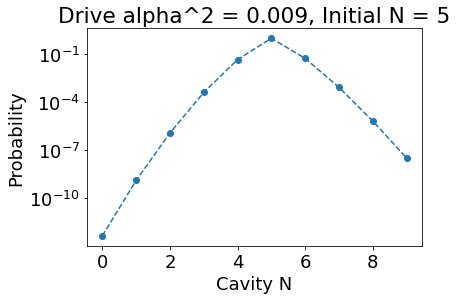

In [147]:
initial_n = 5
drive_nbar = (amp*300/2)**2
# window = ceil(initial_n/2)
# test_n = linspace(initial_n-window,initial_n+window, 2*window+1)
max_n = 9
test_n = np.linspace(0,max_n, max_n+1)
from math import gamma, factorial
def P_dn(n, l, nbar):
    if l>=n:
        return factorial(n)/(factorial(l)) * nbar**(l-n) * np.exp(-nbar) * (eval_genlaguerre(n, l-n, nbar))**2
    elif l<n:
        return factorial(l)/(factorial(n)) * nbar**(n-l) * np.exp(-nbar) * (eval_genlaguerre(l, n-l, nbar))**2

Prob = []
for l in test_n:
    Prob.append(P_dn(initial_n, l, drive_nbar))

plt.semilogy(test_n, Prob, 'o--')
plt.xlabel("Cavity N")
plt.ylabel("Probability")
plt.title("Drive alpha^2 = %.3f, Initial N = %.0f" %(drive_nbar, initial_n))
print(sum(Prob))

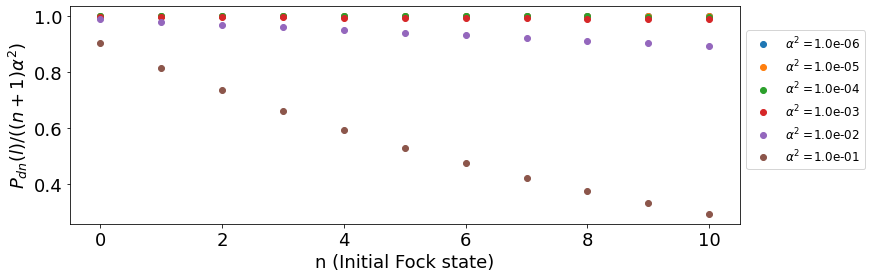

In [191]:
initial_n = np.linspace(0, 10, 11)
drive_nbar = np.logspace(-6, -1, 6)

max_n = 11
test_n = np.linspace(0, max_n, max_n+1)
def P_dn(n, l, nbar):
    if l>=n:
        return factorial(n)/(factorial(l)) * nbar**(l-n) * np.exp(-nbar) * (eval_genlaguerre(n, l-n, nbar))**2
    elif l<n:
        return factorial(l)/(factorial(n)) * nbar**(n-l) * np.exp(-nbar) * (eval_genlaguerre(l, n-l, nbar))**2

plt.figure(figsize = (12, 4))
for ii, nbar in enumerate(drive_nbar):
    F_n = []
    for n in initial_n:
        F_n.append(P_dn(n, n+1, nbar)/((n+1)*nbar))
    plt.plot(initial_n, F_n, 'o', label=r'$\alpha^{:^n}$ ={:^.1e}'.format(2, nbar))
plt.legend(loc= (1.01, 0.25), fontsize=12)
plt.xlabel("n (Initial Fock state)")
plt.ylabel(r'$P_{dn}(l)/((n+1)\alpha^{2}$)')
plt.show()

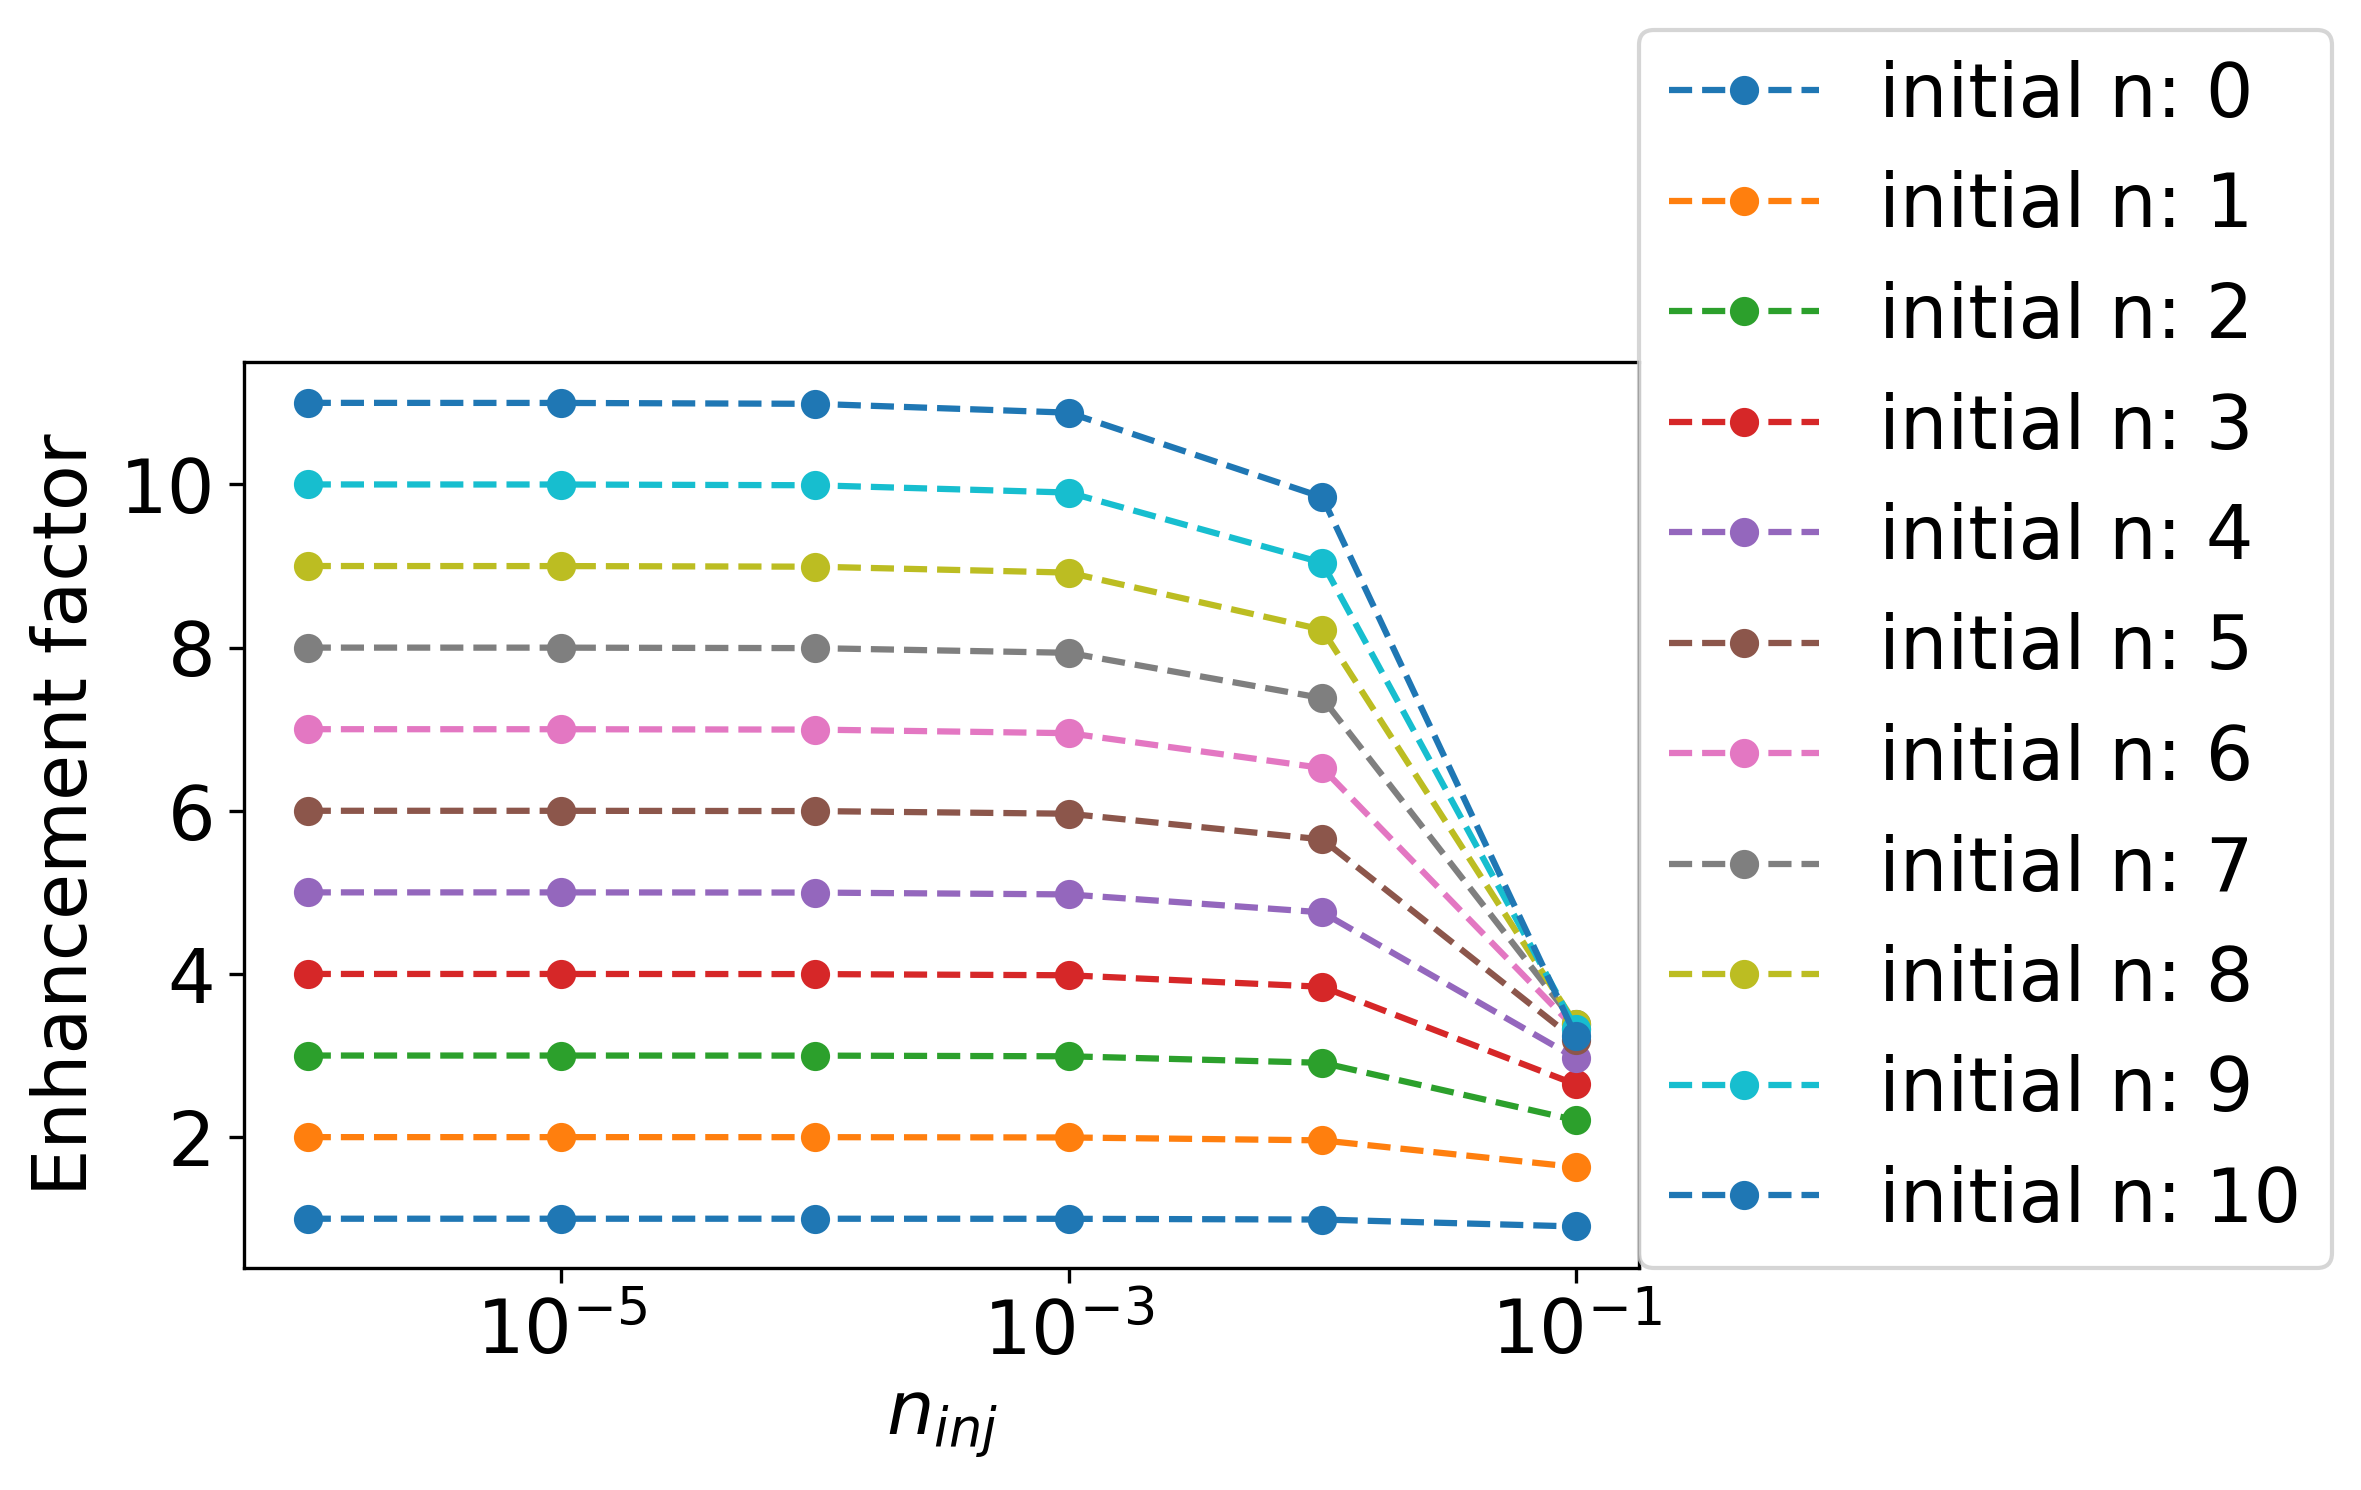

In [264]:
plt.figure(dpi=300)
for n in initial_n:
    F_n = []
    for nbar in drive_nbar:
        F_n.append(P_dn(n, n+1, nbar)/(nbar))
    plt.semilogx(drive_nbar, F_n, 'o--', label="initial n: %.0f" %(n))
plt.legend(loc=(1,0))
plt.ylabel('Enhancement factor')
plt.xlabel("$n_{inj}$")
plt.show()

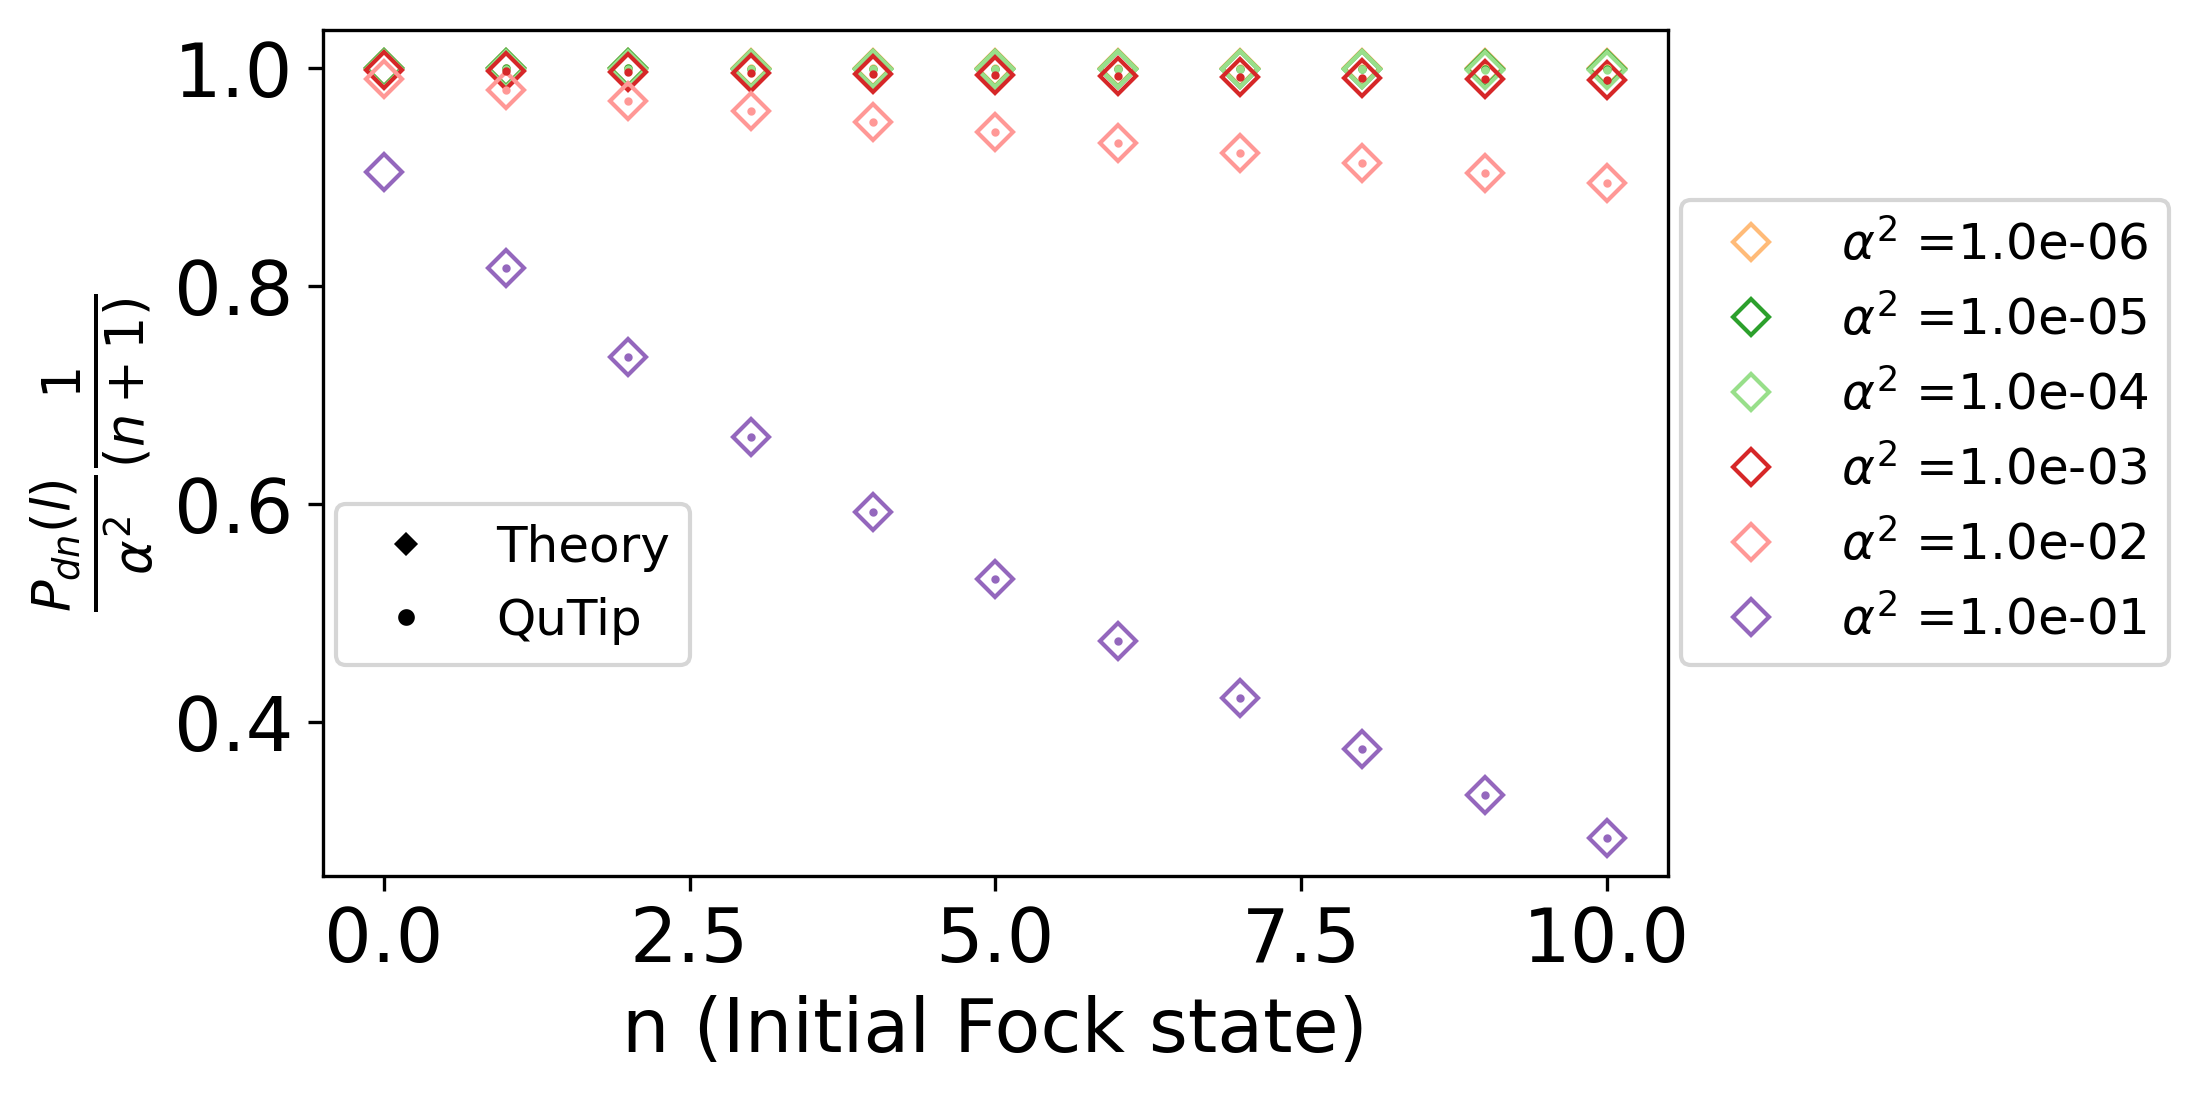

In [239]:
initial_n = np.linspace(0, 10, 11)
drive_nbar = np.logspace(-6, -1, 6)

max_n = 11
test_n = np.linspace(0, max_n, max_n+1)
def P_dn(n, l, nbar):
    if l>=n:
        return factorial(n)/(factorial(l)) * nbar**(l-n) * np.exp(-nbar) * (eval_genlaguerre(n, l-n, nbar))**2
    elif l<n:
        return factorial(l)/(factorial(n)) * nbar**(n-l) * np.exp(-nbar) * (eval_genlaguerre(l, n-l, nbar))**2

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

for ii, nbar in enumerate(drive_nbar):
    F_n = []
    for n in initial_n:
        F_n.append(P_dn(n, n+1, nbar)/((n+1)*nbar))
    plt.plot(initial_n, F_n, 'D', fillstyle='none', label=r'$\alpha^{:^n}$ ={:^.1e}'.format(2, nbar), color=tableau20[ii+3])
dim = 20
alpha_list = np.sqrt(np.logspace(-6, -1, 6))
leg1 = ax.legend(loc= (1.01, 0.25), fontsize=12)

fock_start_list = range(1,11)
plot_pop_list = [1]
for ii, alpha in enumerate(alpha_list):
    states = []
    pop_list = []
    enh_f = []
    for fock_start in fock_start_list:
        state = displace(dim, alpha)*fock(dim,fock_start)
        p = expect(ket2dm(fock(dim, fock_start+1)), state)
        pop_list.append(p)
        f = p/alpha**2/(fock_start+1)
        enh_f.append(f)
    ax.plot(fock_start_list, enh_f, 'o', markersize=1, label=r'$\alpha^{:^n}$={:^.1e}'.format(2, alpha**2), color=tableau20[ii+3])

legend_elements = [Line2D([0], [0], marker='D', fillstyle='none', color='w', label='Theory',
                          markerfacecolor='k', markersize=5),
                   Line2D([0], [0], marker='o', fillstyle='none', color='w', label='QuTip',
                          markerfacecolor='k', markersize=5),]
leg2 = ax.legend(loc= (0.01, 0.25), fontsize=12, handles=legend_elements)
ax.add_artist(leg1)
ax.set_xlabel("n (Initial Fock state)")
ax.set_ylabel(r'$\frac{P_{dn}(l)}{\alpha^{2}} \frac{1}{(n+1)}$')
plt.tight_layout()
plt.show()

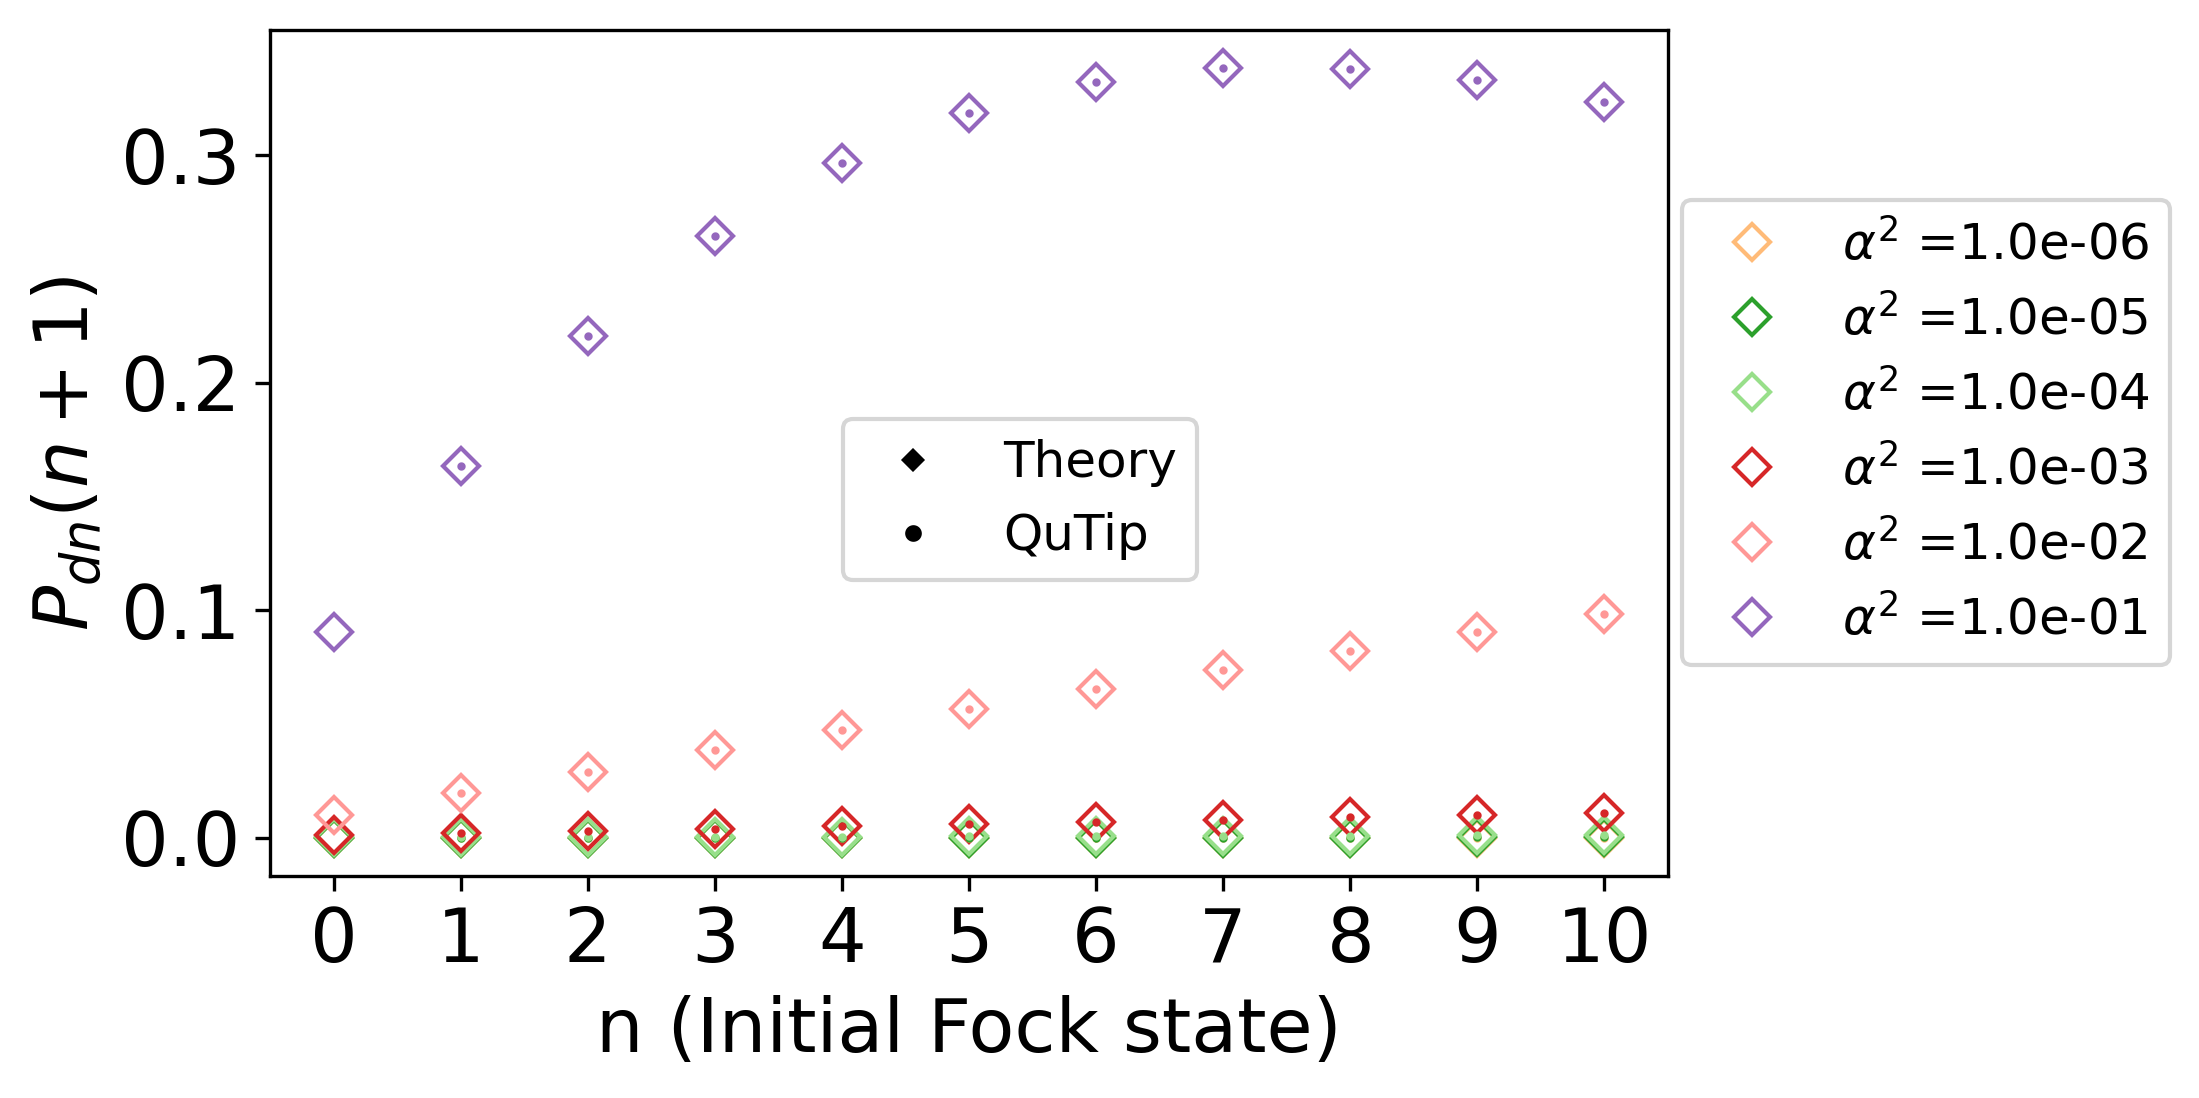

In [263]:
initial_n = np.linspace(0, 10, 11)
drive_nbar = np.logspace(-6, -1, 6)

max_n = 11
test_n = np.linspace(0, max_n, max_n+1)
def P_dn(n, l, nbar):
    if l>=n:
        return factorial(n)/(factorial(l)) * nbar**(l-n) * np.exp(-nbar) * (eval_genlaguerre(n, l-n, nbar))**2
    elif l<n:
        return factorial(l)/(factorial(n)) * nbar**(n-l) * np.exp(-nbar) * (eval_genlaguerre(l, n-l, nbar))**2

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

for ii, nbar in enumerate(drive_nbar):
    F_n = []
    for n in initial_n:
        F_n.append(P_dn(n, n+1, nbar))
    plt.plot(initial_n, F_n, 'D', fillstyle='none', label=r'$\alpha^{:^n}$ ={:^.1e}'.format(2, nbar), color=tableau20[ii+3])
dim = 30
alpha_list = np.sqrt(np.logspace(-6, -1, 6))
leg1 = ax.legend(loc= (1.01, 0.25), fontsize=12)

fock_start_list = range(1,11)
plot_pop_list = [1]
for ii, alpha in enumerate(alpha_list):
    states = []
    pop_list = []
    enh_f = []
    for fock_start in fock_start_list:
        state = displace(dim, alpha)*fock(dim,fock_start)
        p = expect(ket2dm(fock(dim, fock_start+1)), state)
        pop_list.append(p)
        f = p
        enh_f.append(f)
    ax.plot(fock_start_list, enh_f, 'o', markersize=1, label=r'$\alpha^{:^n}$={:^.1e}'.format(2, alpha**2), color=tableau20[ii+3])

legend_elements = [Line2D([0], [0], marker='D', fillstyle='none', color='w', label='Theory',
                          markerfacecolor='k', markersize=5),
                   Line2D([0], [0], marker='o', fillstyle='none', color='w', label='QuTip',
                          markerfacecolor='k', markersize=5),]
leg2 = ax.legend(loc= (0.41, 0.35), fontsize=12, handles=legend_elements)
ax.add_artist(leg1)
ax.set_xticks(initial_n)
ax.set_xlabel("n (Initial Fock state)")
ax.set_ylabel(r'$P_{dn}(n+1)$')
plt.tight_layout()
plt.show()

5.5003124712236233e-05

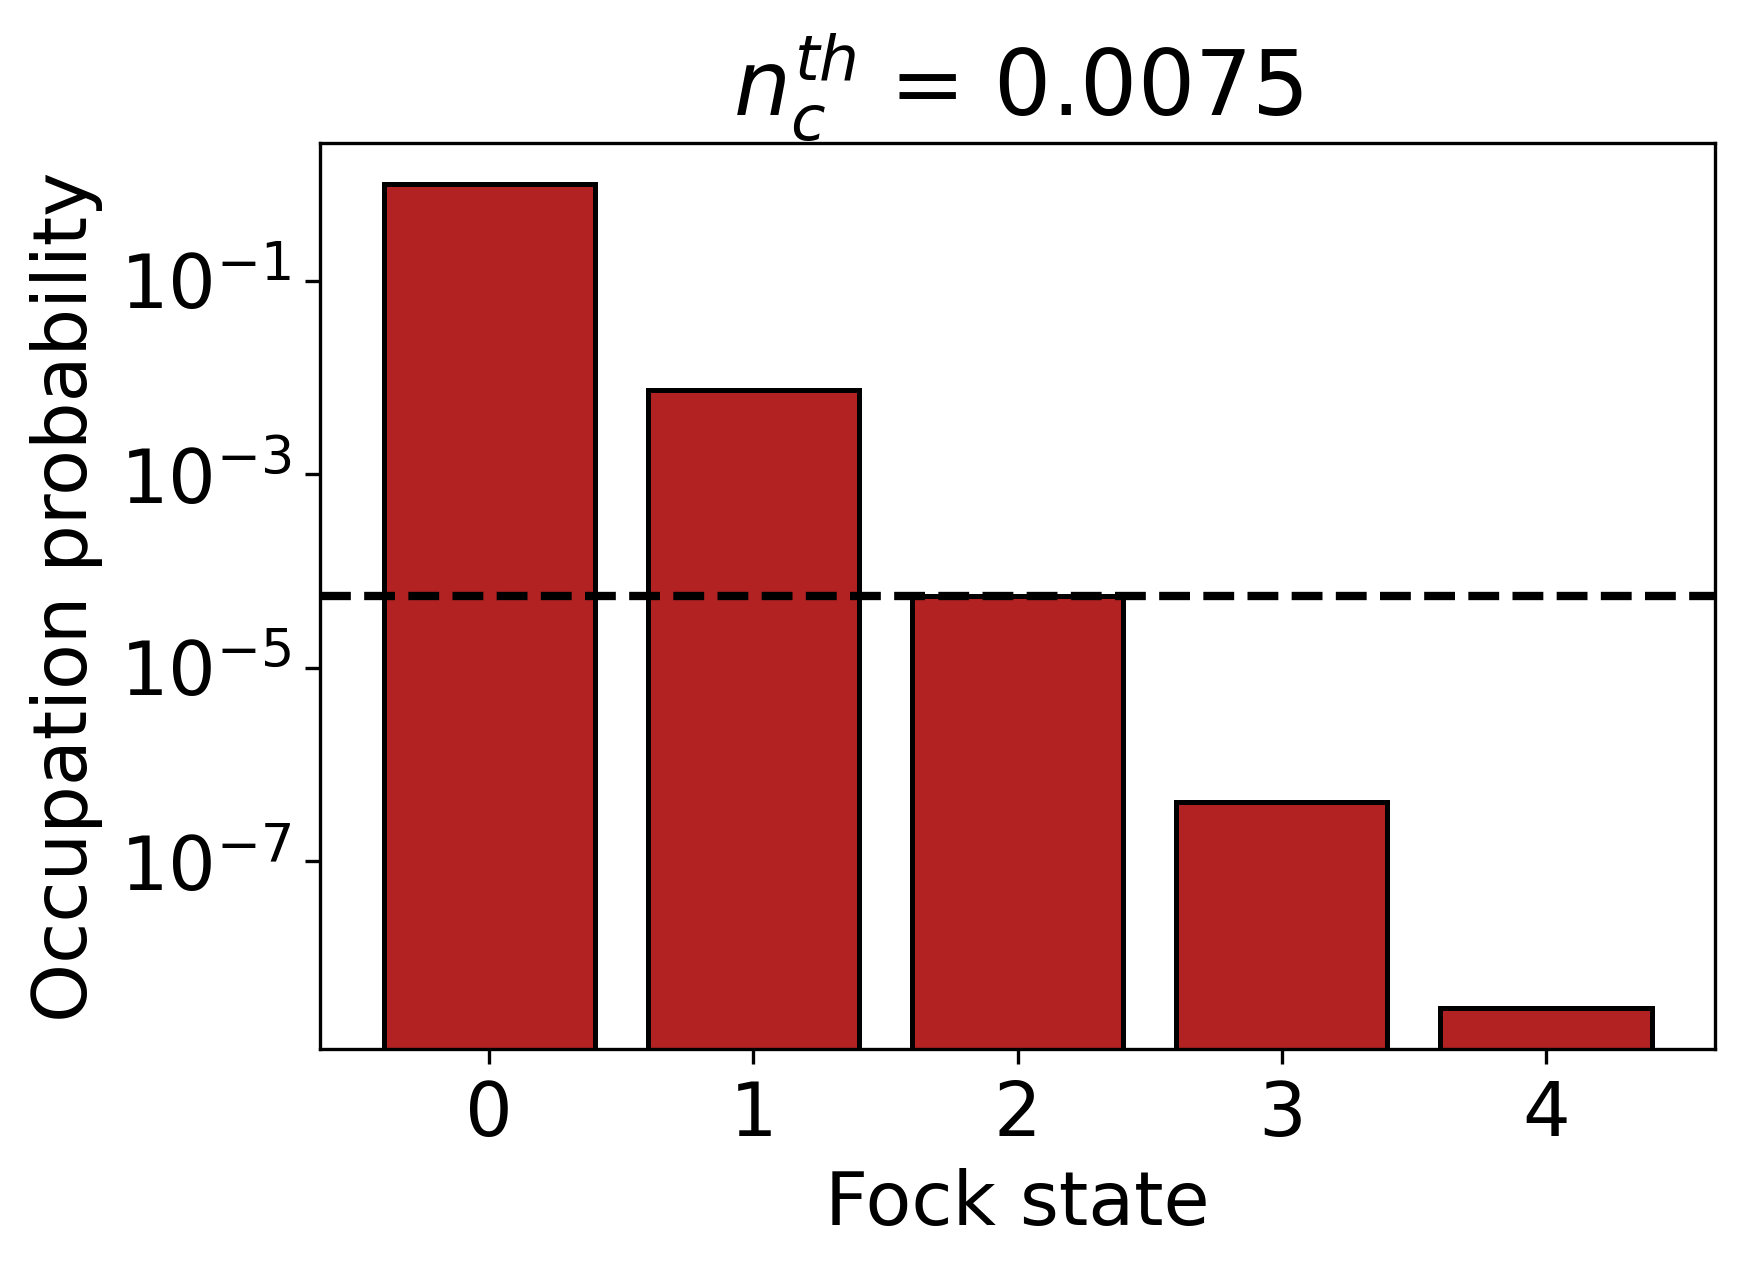

In [300]:
dim = 20
avg_photon = 0.0075
n=2
rho_thermal = thermal_dm(dim, avg_photon)

plt.figure(dpi=300)
plt.bar(np.arange(0, 5), rho_thermal.diag()[0:5], edgecolor='black', linewidth=1.2, facecolor='firebrick')
plt.title(r"$n_{c}^{th}$ = %.4f"%(avg_photon))
plt.ylabel("Occupation probability")
plt.xlabel('Fock state')
plt.yscale('log')
plt.axhline(y=5.5e-5, linestyle='--', linewidth=2, color='k')
op_n = fock(dim,n)*fock(dim,n).dag()
expect(op_n, rho_thermal)

In [299]:
(2.26e-4/0.41)

0.000551219512195122

Final populations using RWA
n=2: 0.0044
n=3: 0.0000
Final avg. photon = 0.956271


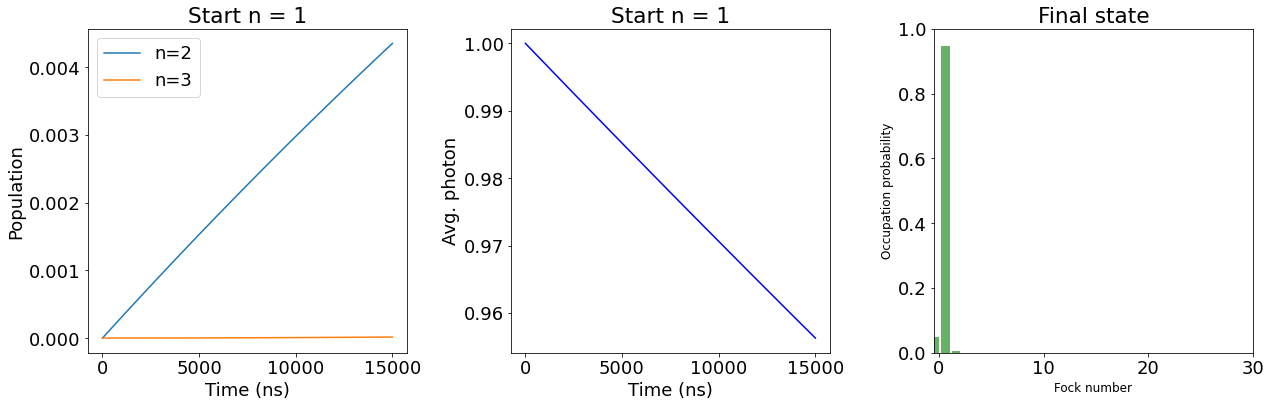

In [328]:
# Resonator parameters
f = 5.77             # in GHz
amp = 0.000 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/2e6) *2*pi   # Coupling rate to heat bath
nth= 0.050          # Temperature with <n>=0.050 K
fock_start = 1
# Simulation parameters
t_end = 15000 # in ns
t_points = 151
plot_pop_list = [1,2]  # List for plotting population
dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())
psi0 = fock(dim,fock_start) # initial state
tlist = np.linspace(0, t_end, t_points)
args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
if use_RWA:
    output = mesolve(H_rwa, psi0, tlist, c_ops, [])
else:
    output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
for n in plot_pop_list:
    ax1.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
ax1.set_title('Start n = %s'%(fock_start))
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Population')
ax1.legend()
ax2 = fig.add_subplot(1,3,2)
ax2.plot(tlist, expect(a.dag()*a, output.states), 'b')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Avg. photon')
ax2.set_title('Start n = %s'%(fock_start))
ax3 = fig.add_subplot(1,3,3)   
plot_fock_distribution(output.states[-1], fig=fig, ax=ax3, title="Final state");
if use_RWA: print('Final populations using RWA')
else: print('Final populations using non-RWA')
for n in plot_pop_list:
    print('n=%s: %.4f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))
fig.tight_layout()
plt.show()

Final populations using RWA
n=1: 0.994641
n=2: 0.000248
n=3: 0.000000
Final avg. photon = 0.995137


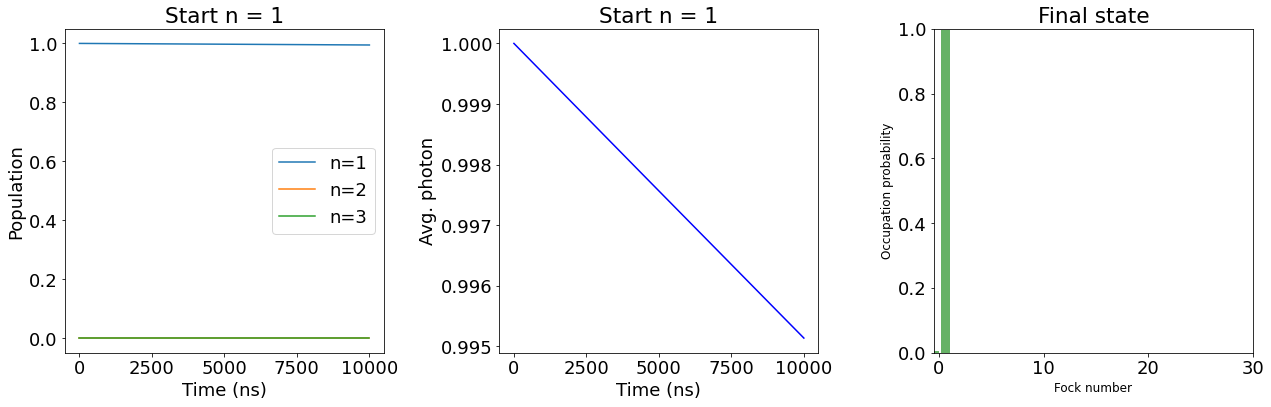

In [410]:
# Resonator parameters
f = 5.965             # in GHz
amp = 0.000 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/2e6)   # Coupling rate to heat bath
nth= 0.025     # thermal photon number
fock_start = 1
# Simulation parameters
t_end = 10000 # in ns
t_points = 1001
plot_pop_list = [0, 1, 2]  # List for plotting population
dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())
psi0 = fock(dim,fock_start) # initial state
tlist = np.linspace(0, t_end, t_points)
args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
if use_RWA:
    output = mesolve(H_rwa, psi0, tlist, c_ops, [])
else:
    output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
for n in plot_pop_list:
    ax1.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
# ax1.plot(tlist, nth*(1-np.exp(-(2*10e3/2e6)*tlist)), label='fit')
ax1.set_title('Start n = %s'%(fock_start))
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Population')
ax1.legend()
ax2 = fig.add_subplot(1,3,2)
ax2.plot(tlist, expect(a.dag()*a, output.states), 'b')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Avg. photon')
ax2.set_title('Start n = %s'%(fock_start))
ax3 = fig.add_subplot(1,3,3)   
plot_fock_distribution(output.states[-1], fig=fig, ax=ax3, title="Final state");
if use_RWA: print('Final populations using RWA')
else: print('Final populations using non-RWA')
for n in plot_pop_list:
    print('n=%s: %.6f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))
fig.tight_layout()
plt.show()

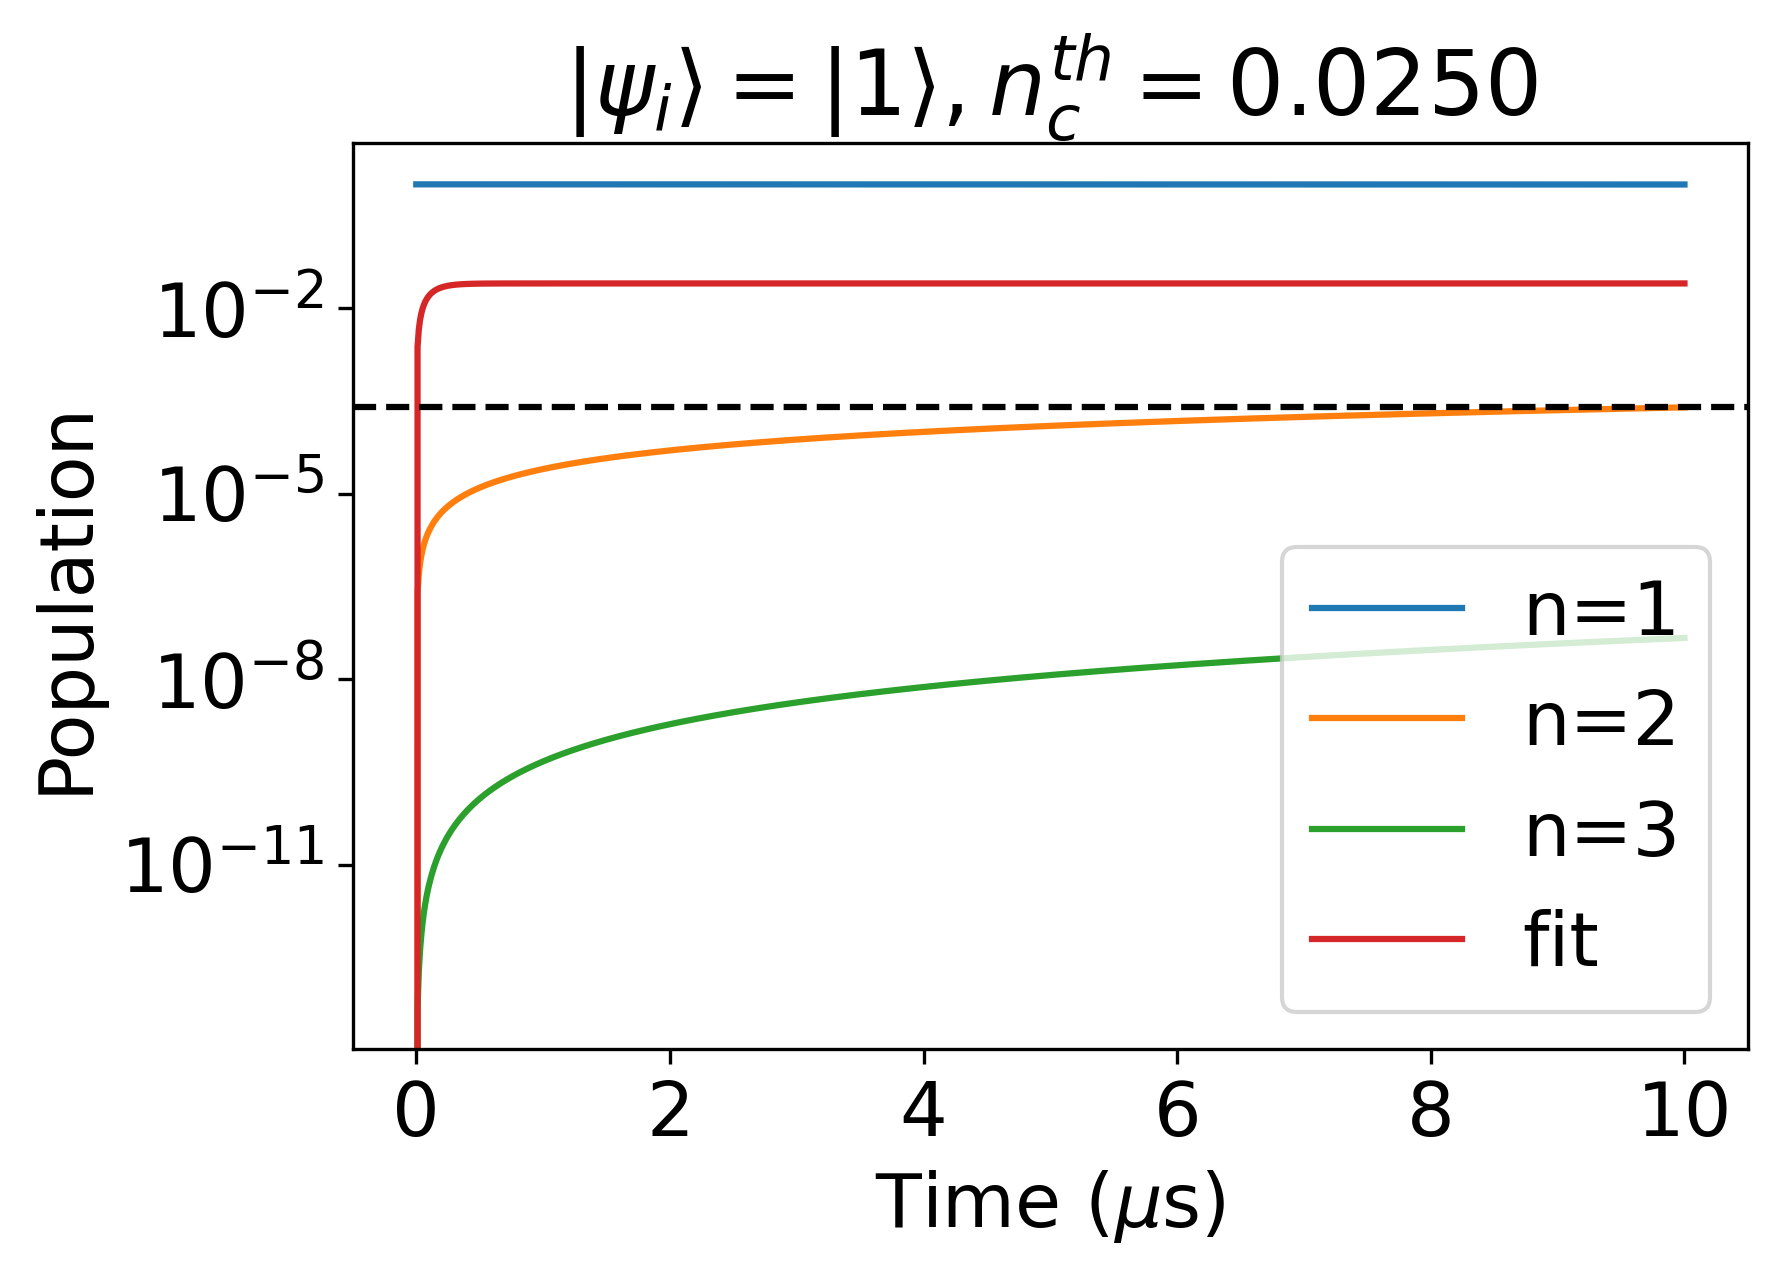

In [411]:
plt.figure(dpi=300)
for n in plot_pop_list:
    plt.plot(tlist/1e3, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
plt.plot(tlist/1e3, nth*(1-np.exp(-(2*10e3/2e6)*tlist)), label='fit')
# plt.title('Start n = %s'%(fock_start))
plt.title(r'$\left|\psi_{i}\right> = \left|%i\right>, n_{c}^{th} = %.4f$'%(fock_start, nth))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population')
plt.yscale('log')
plt.axhline(y=2.53e-4, linestyle='--', color='k')
plt.legend()
plt.show()

In [398]:
1.19e-4/0.41

0.0002902439024390244

Final populations using RWA
n=0: 0.999987
n=1: 0.000013
n=2: 0.000000
Final avg. photon = 0.000013


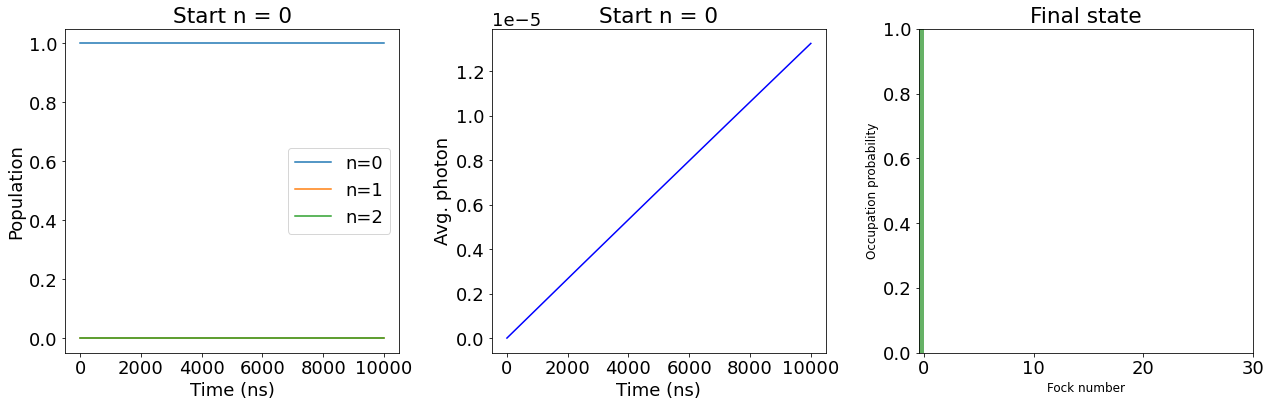

In [3]:
# Resonator parameters
f = 6.01             # in GHz
amp = 0.000 *2*pi   # Drive amplitude = 0.001 GHz
kappa= (1/546e3)   # Coupling rate to heat bath
nth= 7.3e-4     # thermal photon number
fock_start = 0
# Simulation parameters
t_end = 10000 # in ns
t_points = 1001
plot_pop_list = [0, 1, 2]  # List for plotting population
dim = 30
use_RWA = True
# Define the Hamiltonian
a = destroy(dim)
H0 = 2*pi * f * a.dag() * a     # simple HO
H1 = amp * (a + a.dag())        # Drive
H = [H0, [H1, 'cos(w*t)']]      # Total Hamiltonian
H_rwa = H1/2
# Build collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())
psi0 = fock(dim,fock_start) # initial state
tlist = np.linspace(0, t_end, t_points)
args = {'A': 0.5 *2*pi, 'w': f * 2*pi}
if use_RWA:
    output = mesolve(H_rwa, psi0, tlist, c_ops, [])
else:
    output = mesolve(H, psi0, tlist, c_ops, [], args = args, options = Options(nsteps=2000))
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
for n in plot_pop_list:
    ax1.plot(tlist, expect(ket2dm(fock(dim,fock_start+n)), output.states), label='n=%i'%(fock_start+n))
# ax1.plot(tlist, nth*(1-np.exp(-(2*10e3/2e6)*tlist)), label='fit')
ax1.set_title('Start n = %s'%(fock_start))
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Population')
ax1.legend()
ax2 = fig.add_subplot(1,3,2)
ax2.plot(tlist, expect(a.dag()*a, output.states), 'b')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Avg. photon')
ax2.set_title('Start n = %s'%(fock_start))
ax3 = fig.add_subplot(1,3,3)   
plot_fock_distribution(output.states[-1], fig=fig, ax=ax3, title="Final state");
if use_RWA: print('Final populations using RWA')
else: print('Final populations using non-RWA')
for n in plot_pop_list:
    print('n=%s: %.6f' %(fock_start+n, expect(ket2dm(fock(dim,fock_start+n)), output.states[-1])))
print('Final avg. photon = %f' %(expect(a.dag()*a, output.states[-1])))
fig.tight_layout()
plt.show()